# 서울시 서대문구 방문판매업 인허가 정보
데이터 링크 : http://data.seoul.go.kr/dataList/OA-18764/S/1/datasetView.do

In [ ]:
!!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/일일 데이터 분석/

Mounted at /content/drive
/content/drive/MyDrive/일일 데이터 분석


In [20]:
import pandas as pd
import numpy as np
import datetime
import re

import matplotlib.pyplot as plt
plt.rc('font',family='NanumBarunGothic')
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

raw_light_palette = [
    (0, 122, 255), # Blue
    (255, 149, 0), # Orange
    (52, 199, 89), # Green
    (255, 59, 48), # Red
    (175, 82, 222),# Purple
    (255, 45, 85), # Pink
    (88, 86, 214), # Indigo
    (90, 200, 250),# Teal
    (255, 204, 0)  # Yellow
]

light_palette = np.array(raw_light_palette)/255
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

def pie_plot(frequency,labels,palette,title=None):
  labels_frequency = zip(labels,frequency,palette) 
  labels_frequency = sorted(labels_frequency,key=lambda x: x[1],reverse=True)

  sorted_labels = [x[0] for x in labels_frequency] ## 정렬된 라벨
  sorted_frequency = [x[1] for x in labels_frequency] ## 정렬된 빈도수
  sorted_colors = [x[2] for x in labels_frequency] ## 정렬된 색상
  
  # 0값이 있는 경우 제거
  while 0 in sorted_frequency:
    idx = sorted_frequency.index(0)
    sorted_frequency.pop(idx)
    sorted_labels.pop(idx)
  
  fig = plt.figure(figsize=(10,10)) ## 캔버스 생성
  ax = fig.add_subplot() ## 프레임 생성
    
  ## 파이차트 출력
  pie = ax.pie(sorted_frequency,
               startangle=90, 
               counterclock=False, 
               colors = sorted_colors, 
               wedgeprops=wedgeprops
              )
  
  total = np.sum(frequency) ## 빈도수 합
  
  threshold = 5
  sum_pct = 0 ## 퍼센티지
  count_less_5pct = 0 ## 5%보다 작은 라벨의 개수
  spacing = 0.1 # 텍스트 사이의 간격

  for i,l in enumerate(sorted_labels):
      ang1, ang2 = ax.patches[i].theta1, ax.patches[i].theta2 ## 파이의 시작 각도와 끝 각도
      center, r = ax.patches[i].center, ax.patches[i].r ## 파이의 중심 좌표, 반지름
      
      ## 비율 상한선보다 작은 것들은 계단형태로 만든다.
      if sorted_frequency[i]/total*100 < threshold:
          x = (r/2+spacing*count_less_5pct)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0] ## 텍스트 x좌표
          y = (r/2+spacing*count_less_5pct)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1] ## 텍스트 y좌표
          count_less_5pct += 1
      else:
          x = (r/2)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0] ## 텍스트 x좌표
          y = (r/2)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1] ## 텍스트 y좌표
      
      ## 퍼센티지 출력
      if i < len(labels) - 1:
          sum_pct += float(f'{sorted_frequency[i]/total*100:.2f}')
          ax.text(x,y,f'{sorted_frequency[i]/total*100:.2f}%',ha='center',va='center',fontsize=15)
      else: ## 마지막 파이 조각은 퍼센티지의 합이 100이 되도록 비율을 조절
          ax.text(x,y,f'{100-sum_pct:.2f}%',ha='center',va='center',fontsize=15)
  
  plt.legend(pie[0],sorted_labels,loc='upper right',fontsize=13) ## 범례
  if title:
    plt.title(title,size=20)
  plt.show()

In [21]:
df = pd.read_csv('./서울시 서대문구 방문판매업 인허가 정보.csv',encoding='cp949')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 29 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   개방자치단체코드  314 non-null    int64  
 1   관리번호      314 non-null    int64  
 2   인허가일자     314 non-null    int64  
 3   인허가취소일자   3 non-null      float64
 4   영업상태코드    314 non-null    int64  
 5   영업상태명     314 non-null    object 
 6   상세영업상태코드  314 non-null    int64  
 7   상세영업상태명   314 non-null    object 
 8   폐업일자      198 non-null    float64
 9   휴업시작일자    1 non-null      float64
 10  휴업종료일자    1 non-null      float64
 11  재개업일자     3 non-null      float64
 12  전화번호      233 non-null    object 
 13  소재지면적     0 non-null      float64
 14  소재지우편번호   180 non-null    float64
 15  지번주소      311 non-null    object 
 16  도로명주소     265 non-null    object 
 17  도로명우편번호   158 non-null    float64
 18  사업장명      314 non-null    object 
 19  최종수정일자    314 non-null    int64  
 20  데이터갱신구분   314 non-null    object

In [5]:
df.isnull().sum()

개방자치단체코드      0
관리번호          0
인허가일자         0
인허가취소일자     311
영업상태코드        0
영업상태명         0
상세영업상태코드      0
상세영업상태명       0
폐업일자        116
휴업시작일자      313
휴업종료일자      313
재개업일자       311
전화번호         81
소재지면적       314
소재지우편번호     134
지번주소          3
도로명주소        49
도로명우편번호     156
사업장명          0
최종수정일자        0
데이터갱신구분       0
데이터갱신일자       0
업태구분명       314
좌표정보(X)      36
좌표정보(Y)      36
자산규모        239
부채총액        246
자본금         236
판매방식명       314
dtype: int64

In [6]:
df.head()

,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태코드,영업상태명,상세영업상태코드,상세영업상태명,폐업일자,휴업시작일자,...,최종수정일자,데이터갱신구분,데이터갱신일자,업태구분명,좌표정보(X),좌표정보(Y),자산규모,부채총액,자본금,판매방식명
0,3120000,1996312010723200001,19960823,NaN,4,취소/말소/만료/정지/중지,7,직권말소,NaN,NaN,...,20130220175634,I,2018-08-31 23:59:59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3120000,1996312010723200004,19960830,NaN,3,폐업,3,폐업처리,20130911.0,NaN,...,20130911170953,I,2018-08-31 23:59:59.0,NaN,194297.832937,452570.312593,NaN,NaN,NaN,NaN
2,3120000,1996312010723200005,19961014,NaN,3,폐업,3,폐업처리,20080513.0,NaN,...,20080513141353,I,2018-08-31 23:59:59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3120000,1996312010723200007,19961029,NaN,3,폐업,3,폐업처리,20130902.0,NaN,...,20130902142806,I,2018-08-31 23:59:59.0,NaN,192500.456775,451806.103388,NaN,NaN,NaN,NaN
4,3120000,1996312010723200018,19961118,NaN,4,취소/말소/만료/정지/중지,7,직권말소,NaN,NaN,...,20181227130821,U,2018-12-29 02:40:00.0,NaN,193422.545074,453356.334098,NaN,NaN,NaN,NaN


In [40]:
def preprocessing(df):
  dataframe = df.copy()
  dataframe = dataframe.drop(['개방자치단체코드','관리번호','인허가취소일자','휴업시작일자','휴업종료일자','재개업일자','소재지면적','업태구분명','판매방식명'],axis=1)
  dataframe['년'] = dataframe['인허가일자'].map(lambda x: int(str(x)[:4]))
  dataframe['월'] = dataframe['인허가일자'].map(lambda x: int(str(x)[4:6]))
  dataframe['일'] = dataframe['인허가일자'].map(lambda x: int(str(x)[6:]))
  dataframe['요일'] = dataframe['인허가일자'].map(lambda x: datetime.datetime.strptime(str(x),'%Y%m%d').weekday())
  dataframe['인허가일자'] = dataframe['인허가일자'].map(lambda x: datetime.datetime.strptime(str(x),'%Y%m%d') if str(x) != 'nan' else ' ')
  dataframe['폐업일자'] = dataframe['폐업일자'].map(lambda x: datetime.datetime.strptime(str(x)[:-2],'%Y%m%d') if str(x) != 'nan' else ' ')
  return dataframe

data = preprocessing(df)

In [41]:
l = []
for i in range(len(data)):
  if data.iloc[i,:]['폐업일자'] != ' ':
    l.append((data.iloc[i,:]['폐업일자'] - data.iloc[i,:]['인허가일자']).days)
  else:
    l.append(0)

data['총 사업일'] = l

In [42]:
data.head()

,인허가일자,영업상태코드,영업상태명,상세영업상태코드,상세영업상태명,폐업일자,전화번호,소재지우편번호,지번주소,도로명주소,...,좌표정보(X),좌표정보(Y),자산규모,부채총액,자본금,년,월,일,요일,총 사업일
0,1996-08-23,4,취소/말소/만료/정지/중지,7,직권말소,,02 3216 2671,120091.00000,서울특별시 서대문구 홍제*동 ***번지 **호 *층,NaN,...,NaN,NaN,NaN,NaN,NaN,1996,8,23,4,0
1,1996-08-30,3,폐업,3,폐업처리,2013-09-11 00:00:00,324-6222,120110.00000,서울특별시 서대문구 연희동 ***번지 대림상가 ***호,서울특별시 서대문구 연희로 *** ***호 (연희동 대림상가),...,194297.83294,452570.31259,NaN,NaN,NaN,1996,8,30,4,6221
2,1996-10-14,3,폐업,3,폐업처리,2008-05-13 00:00:00,02 722 2725,NaN,은평구 역촌동 **-**,NaN,...,NaN,NaN,NaN,NaN,NaN,1996,10,14,0,4229
3,1996-10-29,3,폐업,3,폐업처리,2013-09-02 00:00:00,NaN,120120.00000,서울특별시 서대문구 남가좌동 ***번지 *호 *층,서울특별시 서대문구 수색로 **-* *층 (남가좌동),...,192500.45677,451806.10339,NaN,NaN,NaN,1996,10,29,1,6152
4,1996-11-18,4,취소/말소/만료/정지/중지,7,직권말소,,309-9100,120100.00000,서울특별시 서대문구 홍은동 ***번지 *호 *층,서울특별시 서대문구 가좌로 *** *층 (홍은동),...,193422.54507,453356.33410,NaN,NaN,NaN,1996,11,18,0,0


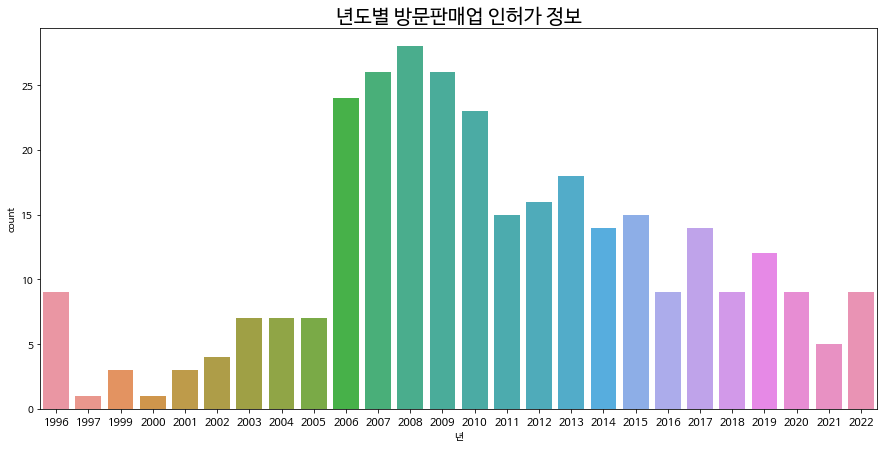

In [12]:
# 년도별 방문판매업 인허가 정보
plt.figure(figsize=(15,7))
sns.countplot(data['년'])
plt.xticks(size=11)
plt.title('년도별 방문판매업 인허가 정보',size=20)
plt.show()

- 2006 ~ 2010까지 방문판매업의 호황기였으며, 이후 점차 줄어들고 있다.

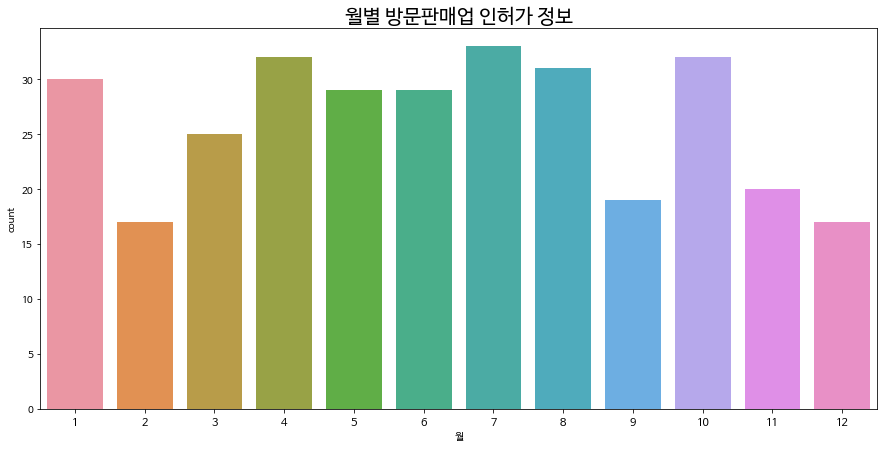

In [13]:
plt.figure(figsize=(15,7))
sns.countplot(data['월'])
plt.xticks(size=11)
plt.title('월별 방문판매업 인허가 정보',size=20)
plt.show()

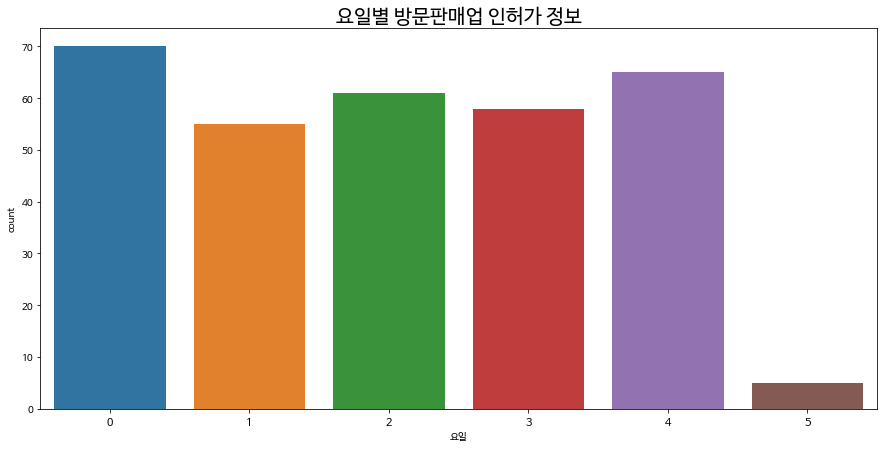

In [14]:
plt.figure(figsize=(15,7))
sns.countplot(data['요일'])
plt.xticks(size=11)
plt.title('요일별 방문판매업 인허가 정보',size=20)
plt.show()

- 방문판매업은 주로 평일에 이루어진다.

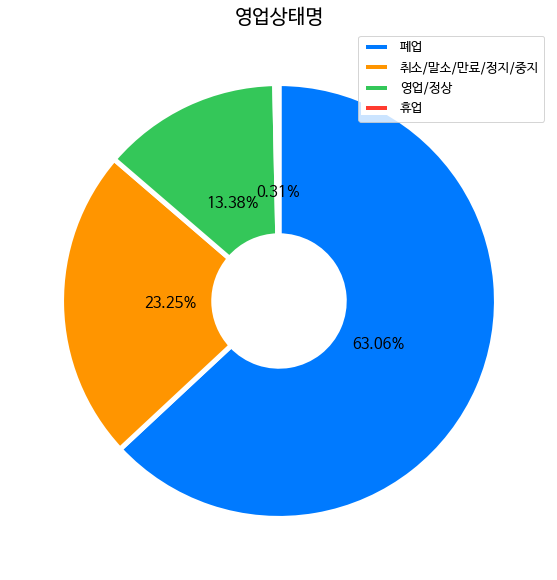

In [18]:
pie_plot(data['영업상태명'].value_counts(),data['영업상태명'].value_counts().index,light_palette,'영업상태명')

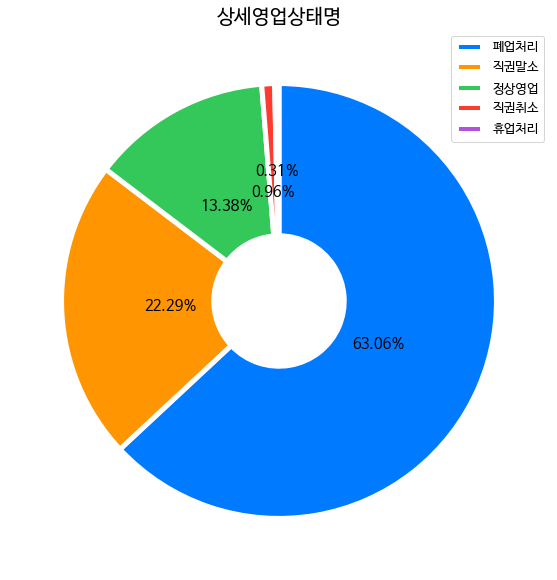

In [26]:
pie_plot(data['상세영업상태명'].value_counts(),data['상세영업상태명'].value_counts().index,light_palette,'상세영업상태명')

- 전체데이터 중 폐업이 63%로 가장 많았으며, 취소/말소/만료/정지/중지가 23.25%로 대부분이 영업하지 않고 있는 상태이다.
- 현재 영업하고 있는 방문판매업은 약 13%였다.

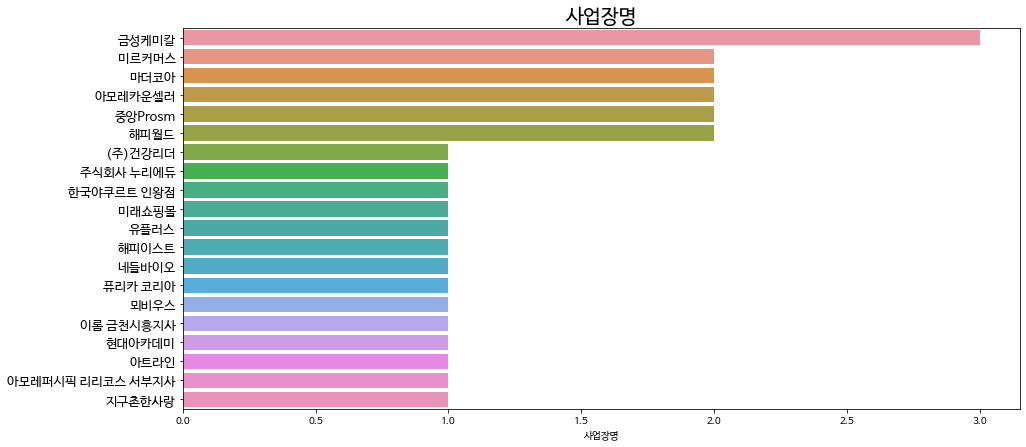

In [16]:
plt.figure(figsize=(15,7))
sns.barplot(x = data['사업장명'].value_counts()[:20],y = data['사업장명'].value_counts()[:20].index)
plt.yticks(size=13)
plt.title('사업장명',size=20)
plt.show()

- 인허가 내역이 가장 많은 사업장은 금성케미칼로 3번의 내역이 존재했다.


count    314.00000
mean     856.32166
std     1370.80129
min        0.00000
25%        0.00000
50%      176.00000
75%     1123.75000
max     8353.00000
Name: 총 사업일, dtype: float64


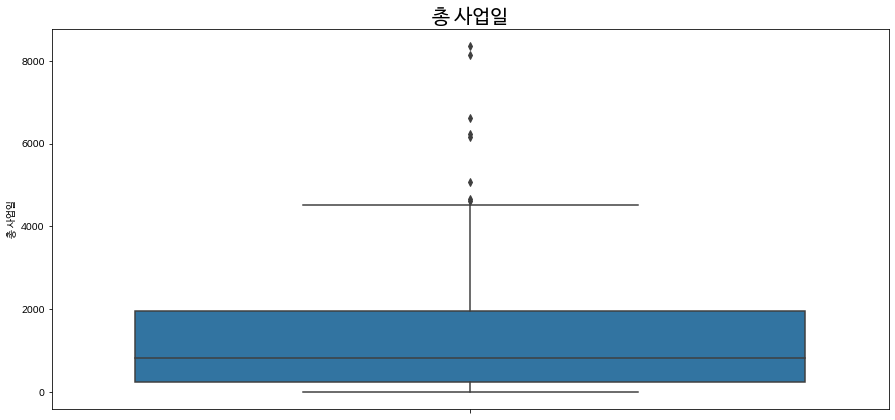

In [43]:
pd.options.display.float_format = '{:.5f}'.format
print(data['총 사업일'].describe())
cost_df = data[data['총 사업일'] != 0]
plt.figure(figsize=(15,7))
sns.boxplot(y = cost_df['총 사업일'])
plt.title('총 사업일',size=20)
plt.show()

In [44]:
# 사업일이 가장 길었던 사업장
data[data['총 사업일'] == 8353]

,인허가일자,영업상태코드,영업상태명,상세영업상태코드,상세영업상태명,폐업일자,전화번호,소재지우편번호,지번주소,도로명주소,...,좌표정보(X),좌표정보(Y),자산규모,부채총액,자본금,년,월,일,요일,총 사업일
204,1996-01-01,3,폐업,3,폐업처리,2018-11-14 00:00:00,02 809 4430,120110.00000,서울특별시 서대문구 연희동 ***번지 **호 ***동 ***호,서울특별시 서대문구 성산로 *** ***동 ***호 (연희동),...,193879.47778,451295.86614,NaN,NaN,NaN,1996,1,1,0,8353


count            75.00000
mean     2158014126.69333
std      9829151839.73409
min               0.00000
25%               0.00000
50%        48876319.00000
75%       400311978.00000
max     74945755704.00000
Name: 자산규모, dtype: float64


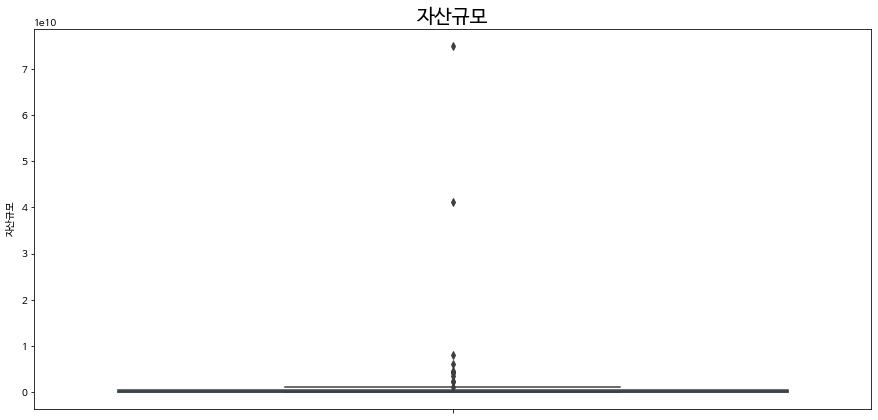

In [30]:
print(data['자산규모'].describe())
cost_df = data[data['자산규모'].isnull() == False]
plt.figure(figsize=(15,7))
sns.boxplot(y = cost_df['자산규모'])
plt.title('자산규모',size=20)
plt.show()

count            68.00000
mean     1013674848.42647
std      4350285583.60932
min               0.00000
25%               0.00000
50%         9670457.00000
75%       331059123.75000
max     34069581178.00000
Name: 부채총액, dtype: float64


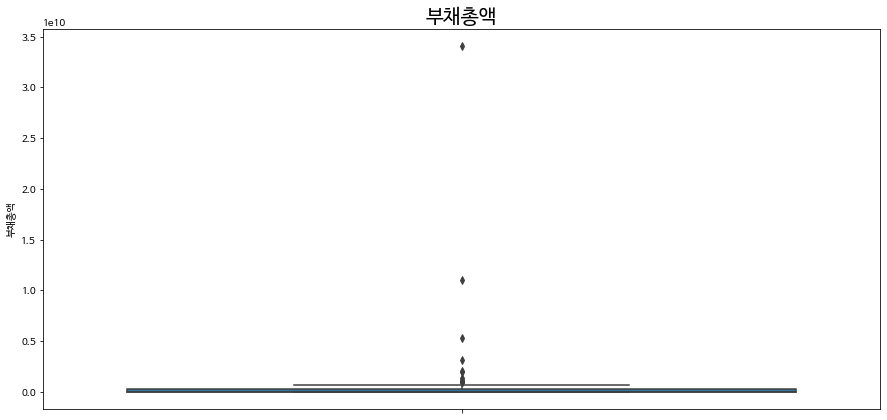

In [31]:
print(data['부채총액'].describe())
cost_df = data[data['부채총액'].isnull() == False]
plt.figure(figsize=(15,7))
sns.boxplot(y = cost_df['부채총액'])
plt.title('부채총액',size=20)
plt.show()

count            78.00000
mean      507741224.65385
std      1965408294.08600
min      -164858000.00000
25%               0.00000
50%        40000000.00000
75%       157500000.00000
max     12770390000.00000
Name: 자본금, dtype: float64


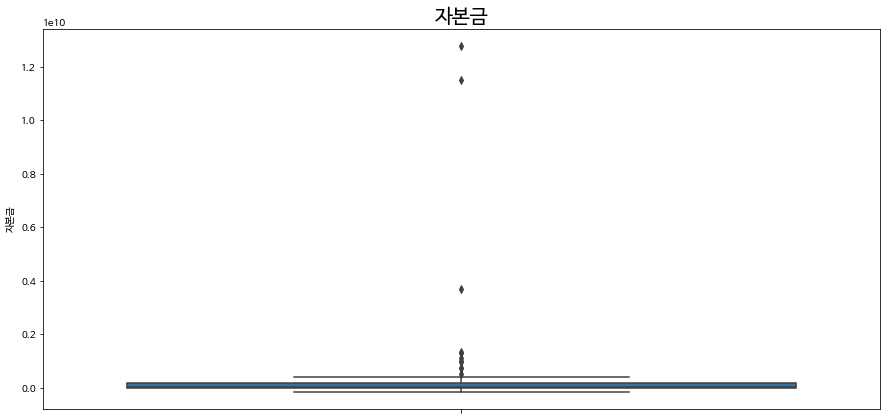

In [33]:
print(data['자본금'].describe())
cost_df = data[data['자본금'].isnull() == False]
plt.figure(figsize=(15,7))
sns.boxplot(y = cost_df['자본금'])
plt.title('자본금',size=20)
plt.show()

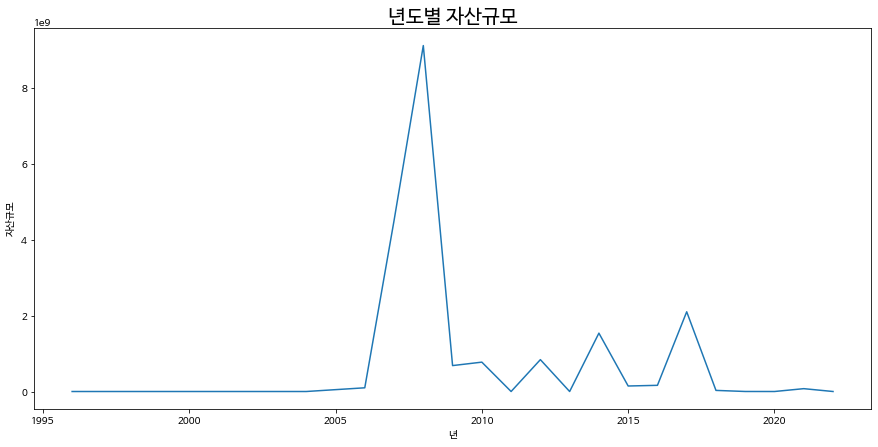

In [ ]:
cost_df = data.groupby('년')['자산규모'].mean()
plt.figure(figsize=(15,7))
sns.lineplot(y=cost_df,x=cost_df.index)
plt.title('년도별 자산규모',size=20)
plt.show()

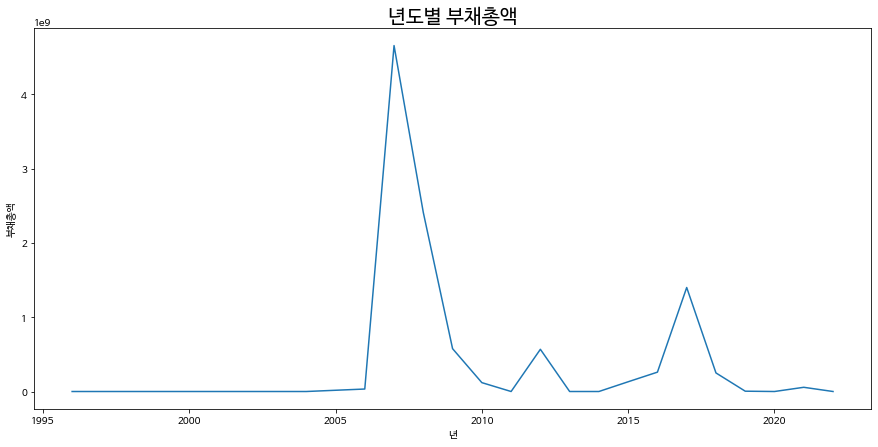

In [ ]:
cost_df = data.groupby('년')['부채총액'].mean()
plt.figure(figsize=(15,7))
sns.lineplot(y=cost_df,x=cost_df.index)
plt.title('년도별 부채총액',size=20)
plt.show()

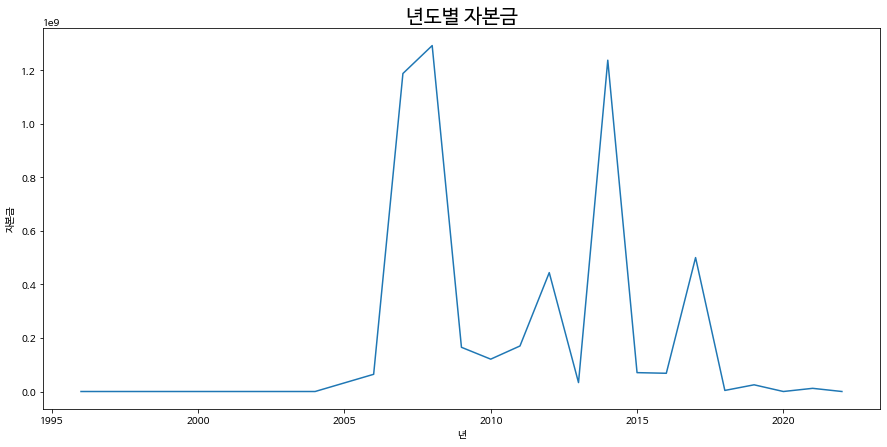

In [ ]:
cost_df = data.groupby('년')['자본금'].mean()
plt.figure(figsize=(15,7))
sns.lineplot(y=cost_df,x=cost_df.index)
plt.title('년도별 자본금',size=20)
plt.show()